# 서울시 가구원수별 가구수(구별) 통계

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns

In [2]:
df = pd.read_table('./과제data/report (1).txt' , header=1, thousands = ',') # thousands = ',' 로 숫자단위를 지정하던 , 없애기
df.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,3896389,1299787,1005065,801819,614026,138596,29336,7760,2.3
1,2019,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,2019,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,2019,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,2019,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3


In [3]:
del df['기간']
df.head()

,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,합계,3896389,1299787,1005065,801819,614026,138596,29336,7760,2.3
1,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3


In [4]:
df.drop([0], inplace=True)
df.head()

,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
5,광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [5]:
df.rename({'구분': '구별', '일반가구수' : '전체가구수'}, inplace=True, axis=1)
df.head()

,구별,전체가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
5,광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [6]:
df['4인'] = df['4인'] + df['5인'] + df['6인'] + df['7인 이상']
df.head()

,구별,전체가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,10619,2143,505,143,2.2
2,중구,54496,22078,14578,9540,8300,1533,373,102,2.1
3,용산구,93177,35148,25164,17439,15426,2907,612,171,2.2
4,성동구,122770,41488,32125,25634,23523,4014,877,253,2.3
5,광진구,149905,58714,35678,28054,27459,4711,1006,288,2.2


In [7]:
df.rename({'4인': '4인이상'}, inplace=True, axis=1)
del df['5인']; del df['6인']; del df['7인 이상']
df.head()

,구별,전체가구수,1인,2인,3인,4인이상,평균가구원수
1,종로구,62652,24671,16208,11154,10619,2.2
2,중구,54496,22078,14578,9540,8300,2.1
3,용산구,93177,35148,25164,17439,15426,2.2
4,성동구,122770,41488,32125,25634,23523,2.3
5,광진구,149905,58714,35678,28054,27459,2.2


In [8]:
df['1인가구비율'] = df['1인'] / df['전체가구수'] * 100
df['2인가구비율'] = df['2인'] / df['전체가구수'] * 100
df.head()

,구별,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율
1,종로구,62652,24671,16208,11154,10619,2.2,39.377833,25.869884
2,중구,54496,22078,14578,9540,8300,2.1,40.513065,26.750587
3,용산구,93177,35148,25164,17439,15426,2.2,37.721755,27.006665
4,성동구,122770,41488,32125,25634,23523,2.3,33.793272,26.166816
5,광진구,149905,58714,35678,28054,27459,2.2,39.167473,23.800407


In [9]:
# 1인가구가 많은 순서
df.sort_values(by='1인', ascending=False).head()

,구별,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율
21,관악구,242154,119863,55423,34875,31993,2.0,49.498666,22.887501
16,강서구,240135,79371,63517,49322,47925,2.3,33.052658,26.450538
24,송파구,252212,68861,65402,57821,60128,2.5,27.302825,25.931359
23,강남구,206524,66073,51560,43435,45456,2.4,31.992892,24.965621
20,동작구,164963,60088,40739,32514,31622,2.3,36.425138,24.695841


In [10]:
# 4인가구가 많은 순서
df.sort_values(by='4인이상', ascending=False).head()

,구별,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율
24,송파구,252212,68861,65402,57821,60128,2.5,27.302825,25.931359
11,노원구,201458,53365,52832,46783,48478,2.5,26.489392,26.224821
16,강서구,240135,79371,63517,49322,47925,2.3,33.052658,26.450538
23,강남구,206524,66073,51560,43435,45456,2.4,31.992892,24.965621
15,양천구,162867,36345,41435,40897,44190,2.6,22.315755,25.441004


In [11]:
df.sort_values(by='평균가구원수', ascending=False).head()

,구별,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율
15,양천구,162867,36345,41435,40897,44190,2.6,22.315755,25.441004
25,강동구,162976,45188,43297,36735,37756,2.5,27.726782,26.566488
24,송파구,252212,68861,65402,57821,60128,2.5,27.302825,25.931359
22,서초구,155377,42667,38892,35327,38491,2.5,27.460306,25.030732
10,도봉구,126831,32653,36329,29580,28269,2.5,25.745283,28.643628


In [12]:
df2 = pd.read_table('./과제data/report.txt' , header=2, thousands = ',') # thousands = ',' 로 숫자단위를 지정하던 , 없애기
df2.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,4405833,9953009,4840912,5112097,9699232,4719170,4980062,253777,121742,132035,2.20,1552356
1,2020.3/4,종로구,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2.00,28396
2,2020.3/4,중구,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265
3,2020.3/4,용산구,112451,244953,119074,125879,229786,110604,119182,15167,8470,6697,2.04,39995
4,2020.3/4,성동구,136096,302695,147582,155113,295591,144444,151147,7104,3138,3966,2.17,45372


In [13]:
# 필요없는데이터 지우기
del df2['세대']
del df2['남자']
del df2['여자']
del df2['남자.1']
del df2['여자.1']
del df2['남자.2']
del df2['여자.2']
del df2['세대당인구']
del df2['기간']
df2.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [14]:
# 합계 지우기
df2.drop([0], inplace=True)
df2.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [15]:
df2.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인', '65세이상고령자': '고령자'}, inplace=True, axis=1)
df2.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [16]:
df2['외국인비율'] = df2['외국인'] / df2['인구수'] * 100
df2['고령자비율'] = df2['고령자'] / df2['인구수'] * 100
df2.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [17]:
result = pd.merge(df, df2, on='구별')
result.head()

,구별,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,62652,24671,16208,11154,10619,2.2,39.377833,25.869884,159842,149952,9890,28396,6.187360,17.765043
1,중구,54496,22078,14578,9540,8300,2.1,40.513065,26.750587,135321,125800,9521,24265,7.035863,17.931437
2,용산구,93177,35148,25164,17439,15426,2.2,37.721755,27.006665,244953,229786,15167,39995,6.191800,16.327622
3,성동구,122770,41488,32125,25634,23523,2.3,33.793272,26.166816,302695,295591,7104,45372,2.346917,14.989346
4,광진구,149905,58714,35678,28054,27459,2.2,39.167473,23.800407,361923,348064,13859,50047,3.829268,13.828079


In [18]:
# 구를 인덱스로 설정
result.set_index('구별', inplace=True)
result.head()

,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,,,
종로구,62652,24671,16208,11154,10619,2.2,39.377833,25.869884,159842,149952,9890,28396,6.187360,17.765043
중구,54496,22078,14578,9540,8300,2.1,40.513065,26.750587,135321,125800,9521,24265,7.035863,17.931437
용산구,93177,35148,25164,17439,15426,2.2,37.721755,27.006665,244953,229786,15167,39995,6.191800,16.327622
성동구,122770,41488,32125,25634,23523,2.3,33.793272,26.166816,302695,295591,7104,45372,2.346917,14.989346
광진구,149905,58714,35678,28054,27459,2.2,39.167473,23.800407,361923,348064,13859,50047,3.829268,13.828079


### 상관관계

In [19]:
np.corrcoef(result['인구수'],result['4인이상'])

array([[1.        , 0.96434579],
       [0.96434579, 1.        ]])

In [20]:
np.corrcoef(result['1인가구비율'],result['외국인비율'])

array([[1.        , 0.59072184],
       [0.59072184, 1.        ]])

In [21]:

df_ana = result[['1인가구비율', '2인가구비율', '평균가구원수', '인구수', '외국인비율', '고령자비율']]
df_corr = df_ana.corr()
df_corr

,1인가구비율,2인가구비율,평균가구원수,인구수,외국인비율,고령자비율
1인가구비율,1.000000,-0.535820,-0.973676,-0.414238,0.590722,0.108239
2인가구비율,-0.535820,1.000000,0.381641,-0.147607,-0.154249,0.569023
평균가구원수,-0.973676,0.381641,1.000000,0.485633,-0.634757,-0.191146
인구수,-0.414238,-0.147607,0.485633,1.000000,-0.617271,-0.544650
외국인비율,0.590722,-0.154249,-0.634757,-0.617271,1.000000,0.139582
고령자비율,0.108239,0.569023,-0.191146,-0.544650,0.139582,1.000000


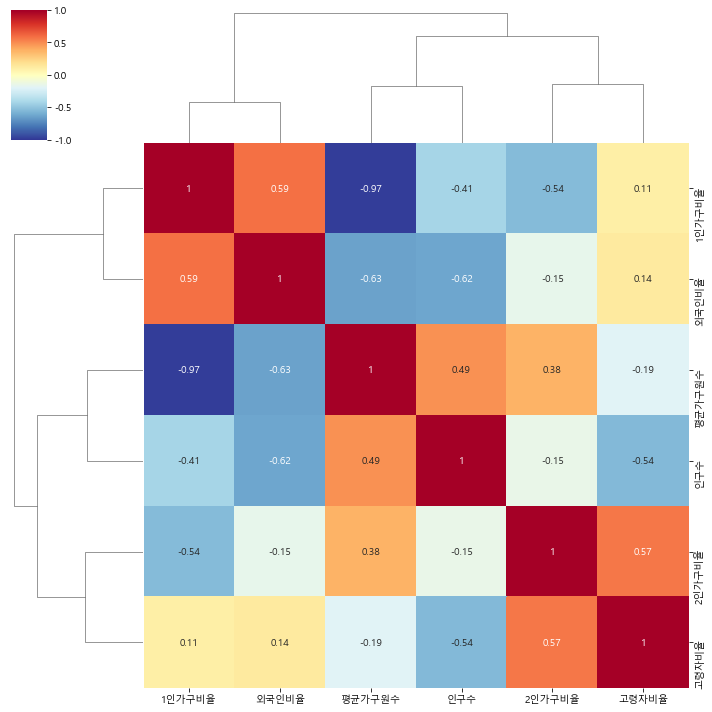

In [22]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

### 1인 가구와 인구수의 상관관계 시각화하기

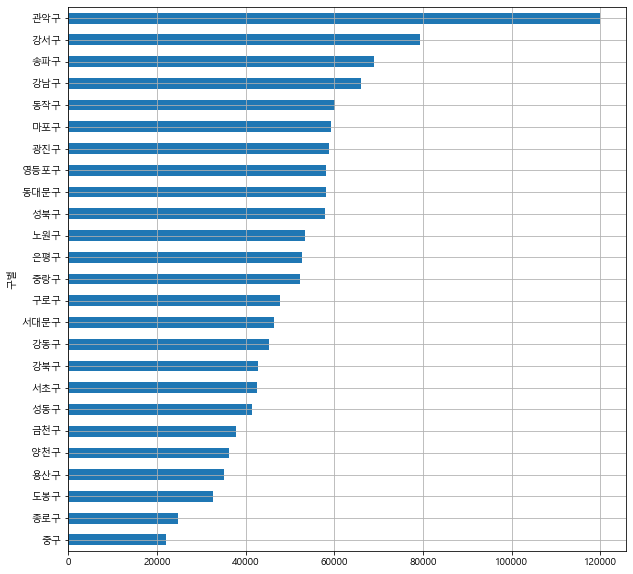

In [23]:
# 1인 이상이 많은 순서대로
result['1인'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [24]:
fp1 =np.polyfit(result['인구수'], result['1인'], 1)
fp1

array([1.04810866e-01, 1.02641403e+04])

In [25]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
fy = f1(fx)

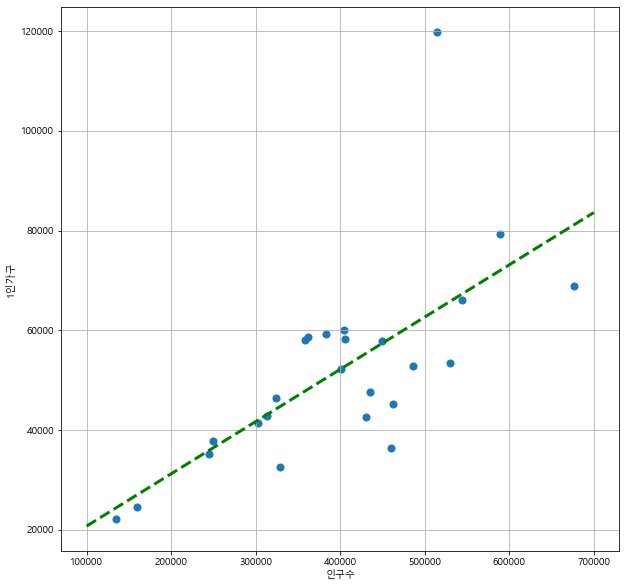

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(result['인구수'], result['1인'], s=50)
plt.plot(fx,fy, ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('1인가구')
plt.grid()
plt.show()

In [27]:
result['오차'] = np.abs(result['1인'] - f1(result['인구수']))
result_sort = result.sort_values('오차', ascending=False)
result_sort.head()

,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,,,
관악구,242154,119863,55423,34875,31993,2.0,49.498666,22.887501,514555,498574,15981,78206,3.105790,15.198764,55667.904546
양천구,162867,36345,41435,40897,44190,2.6,22.315755,25.441004,460048,456240,3808,64804,0.827740,14.086356,22137.169580
강동구,162976,45188,43297,36735,37756,2.5,27.726782,26.566488,462275,458058,4217,68798,0.912228,14.882483,13527.583378
서초구,155377,42667,38892,35327,38491,2.5,27.460306,25.030732,429995,426009,3986,59495,0.926988,13.836207,12665.288623
노원구,201458,53365,52832,46783,48478,2.5,26.489392,26.224821,529532,525486,4046,84612,0.764071,15.978638,12399.847795


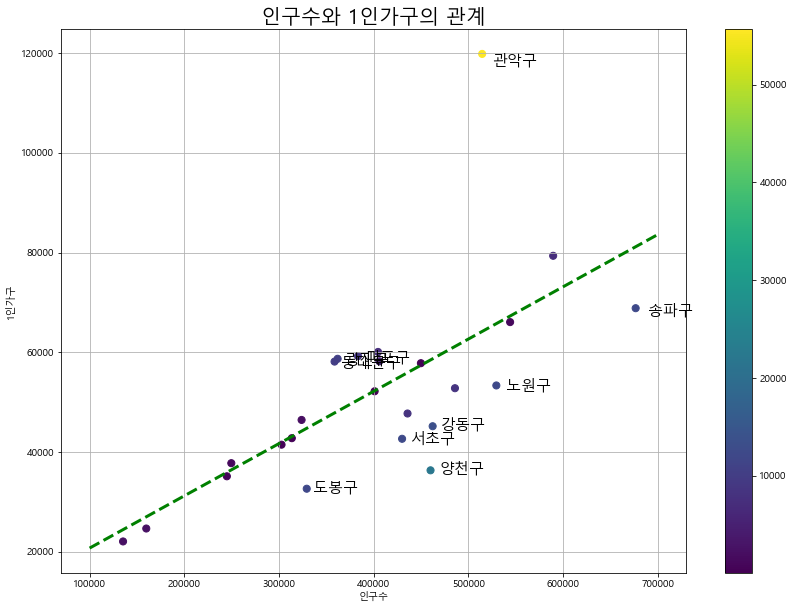

In [28]:
plt.figure(figsize=(14,10))
plt.scatter(result['인구수'], result['1인'], c=result['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(result_sort['인구수'][i]*1.02, result_sort['1인'][i]*0.98,
             result_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 1인가구의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('1인가구')
plt.colorbar()    
plt.show()

#### 관악구가 인구수에 비해 1인가구가 많은 것을 확인 할 수 있다.

In [29]:
fp1 =np.polyfit(result['인구수'], result['평균가구원수'], 1)
fp1

array([5.62083106e-07, 2.09622327e+00])

In [30]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
fy = f1(fx)

In [31]:
result['오차'] = np.abs(result['평균가구원수'] - f1(result['인구수']))
result_sort = result.sort_values('오차', ascending=False)
result_sort.head()

,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,,,
관악구,242154,119863,55423,34875,31993,2.0,49.498666,22.887501,514555,498574,15981,78206,3.105790,15.198764,0.385446
양천구,162867,36345,41435,40897,44190,2.6,22.315755,25.441004,460048,456240,3808,64804,0.827740,14.086356,0.245192
도봉구,126831,32653,36329,29580,28269,2.5,25.745283,28.643628,329300,327248,2052,61388,0.623140,18.641968,0.218683
서초구,155377,42667,38892,35327,38491,2.5,27.460306,25.030732,429995,426009,3986,59495,0.926988,13.836207,0.162084
강동구,162976,45188,43297,36735,37756,2.5,27.726782,26.566488,462275,458058,4217,68798,0.912228,14.882483,0.143940


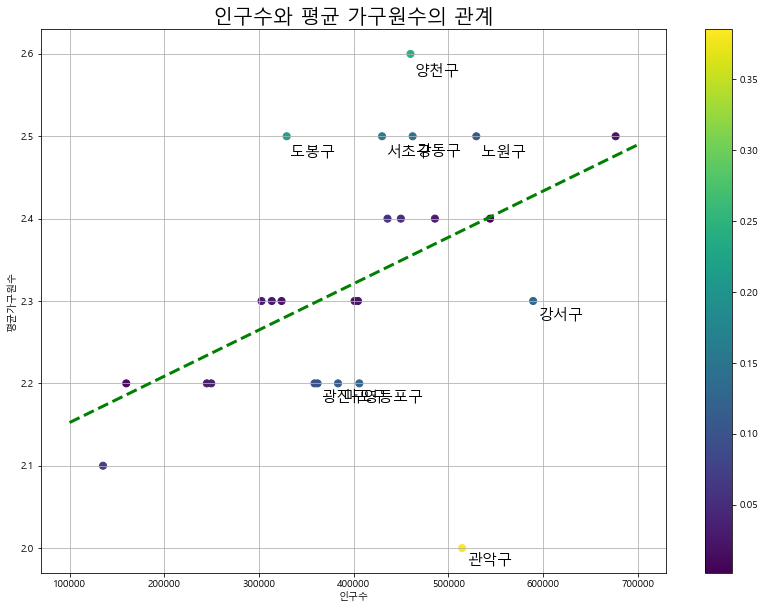

In [32]:
plt.figure(figsize=(14,10))
plt.scatter(result['인구수'], result['평균가구원수'], c=result['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(result_sort['인구수'][i]*1.01, result_sort['평균가구원수'][i]*0.99,
             result_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 평균 가구원수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('평균가구원수')
plt.colorbar()    
plt.show()

### 관악구가 인구수에 비해 압도적으로 평균가구원수가 적은 것을 확인 할 수 있다.

### 1인가구 비율과 외국인 비율의 상관관계

In [33]:
fp1 =np.polyfit(result['1인가구비율'], result['외국인비율'], 1)
fp1

array([ 0.23480781, -4.92658962])

In [34]:
f1 = np.poly1d(fp1)
fx = np.linspace(23, 50, 100)
fy = f1(fx)

In [35]:
result['오차'] = np.abs(result['외국인비율'] - f1(result['1인가구비율']))
result_sort = result.sort_values('오차', ascending=False)
result_sort.head()

,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,,,
구로구,160378,47740,43700,34624,34314,2.4,29.767175,27.248126,435751,405579,30172,69312,6.924138,15.906332,4.861162
관악구,242154,119863,55423,34875,31993,2.0,49.498666,22.887501,514555,498574,15981,78206,3.105790,15.198764,3.590293
영등포구,153923,58214,38671,29661,27377,2.2,37.820209,25.123601,405982,375630,30352,60826,7.476194,14.982438,3.522303
금천구,99315,37778,25207,18771,17559,2.2,38.038564,25.380859,249641,232157,17484,39361,7.003657,15.767041,2.998495
중구,54496,22078,14578,9540,8300,2.1,40.513065,26.750587,135321,125800,9521,24265,7.035863,17.931437,2.449668


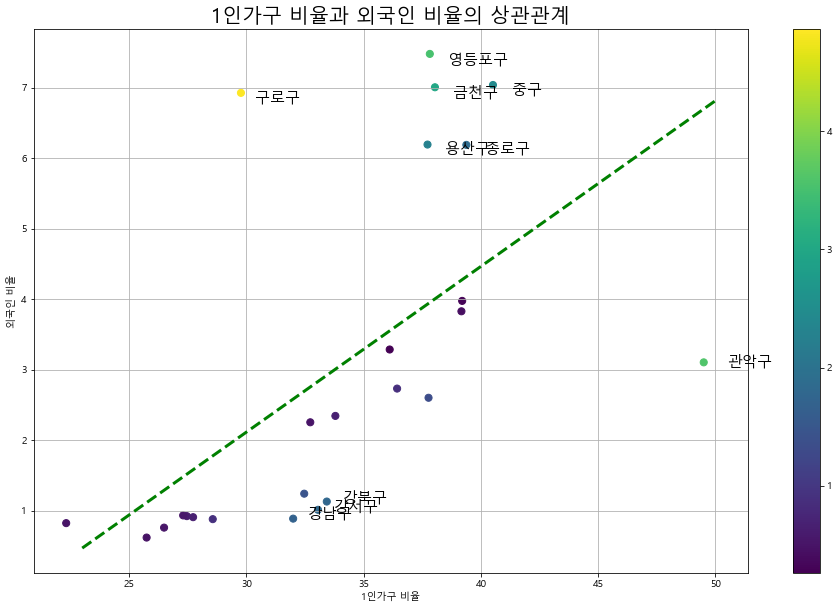

In [36]:
plt.figure(figsize=(16,10))
plt.scatter(result['1인가구비율'], result['외국인비율'], c=result['오차'], s=50)

for i in range(10): 
    plt.text(result_sort['1인가구비율'][i]*1.02, result_sort['외국인비율'][i]*0.98,
             result_sort.index[i], fontsize=15)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 상관관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.colorbar()    
plt.show()

### 2인가구와 고령자비율의 상관관계 시각화 하기

In [37]:
fp1 =np.polyfit(result['2인가구비율'], result['고령자비율'], 1)
fp1

array([ 0.70239388, -2.31261667])

In [38]:
f1 = np.poly1d(fp1)
fx = np.linspace(22, 29, 100)
fy = f1(fx)

In [39]:
result['오차'] = np.abs(result['고령자비율'] - f1(result['2인가구비율']))
result_sort = result.sort_values('오차', ascending=False)
result_sort.head()

,전체가구수,1인,2인,3인,4인이상,평균가구원수,1인가구비율,2인가구비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,,,
강북구,128012,42791,35439,25967,23815,2.3,33.427335,27.684123,313550,309996,3554,62951,1.133472,20.076862,2.944319
동대문구,148349,58152,36060,27436,26701,2.2,39.199455,24.307545,358679,344416,14263,61408,3.976536,17.120601,2.359747
송파구,252212,68861,65402,57821,60128,2.5,27.302825,25.931359,676673,670331,6342,92149,0.937233,13.617951,2.283460
종로구,62652,24671,16208,11154,10619,2.2,39.377833,25.869884,159842,149952,9890,28396,6.187360,17.765043,1.906811
강남구,206524,66073,51560,43435,45456,2.4,31.992892,24.965621,544085,539235,4850,73942,0.891405,13.590156,1.632927


In [40]:
plt.figure(figsize=(16,10))
plt.scatter(result['2인가구비율'], result['고령자비율'], c=result['오차'], s=50)

for i in range(10): 
    plt.text(result_sort['2인가구비율'][i], result_sort['고령자비율'][i]*0.98,
             result_sort.index[i], fontsize=15)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('2인가구 비율과 고령자 비율의 상관관계', fontsize=20)
plt.xlabel('2인가구 비율')
plt.ylabel('고령자 비율')
plt.colorbar()    
plt.show()

In [43]:
result.to_csv('./results/서울시 인구와 가구.csv')